# **Map Conjugacy for the Rossler System**

In [1]:
import numpy as np
from utils import Rossler
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set plotting parameters
parameters = {'axes.labelsize': 16,
              'axes.titlesize': 18,
              'legend.fontsize': 13,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
              'figure.figsize': (12, 8),
              'figure.titlesize': 18,
              'font.serif': 'Computer Modern Roman',
             }
plt.rcParams.update(parameters)
plt.rc('text', usetex=True)

## **Generate Measurement Data**

In [2]:
# Continuous-time simulation data

# Initializations
dt = .005
t_span = np.arange(0, 60000, dt)
x0 = [0, -15, 0] 
c = 11 

# Solution data
xsol = []
xsol = odeint(Rossler, x0, t_span, args = (c,))

Text(0, 0.5, '$x_2(t)$')

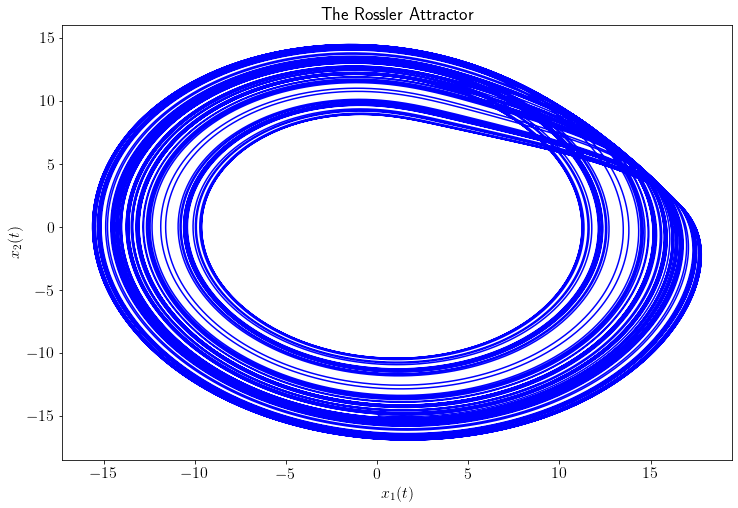

In [3]:
# Plot Rossler Solution (x_2 vs. x_1)

plt.plot(xsol[1:100000,0],xsol[1:100000,1],'b')
plt.title("The Rossler Attractor")
plt.xlabel("$x_1(t)$")
plt.ylabel("$x_2(t)$")

In [4]:
# Create section data

Psec = []
temp = [0]*len(xsol[:,1])
count = 0
for m in range(len(temp)-1):
    if xsol[m,0] <= 0 and xsol[m+1,0] >= 0: # section condition
        temp[count] = xsol[m+1,1] 
        count = count + 1
Psec.append(np.array(temp[1:count]))   

xn, xnp1 = Psec[0][:-1], Psec[0][1:]

#Scale data
max_xn = xn.max()
min_xn = xn.min()

slope = 1/(max_xn - min_xn)
yint = -slope*min_xn

xn = slope*xn + yint
xnp1 = slope*xnp1 + yint

# Build input data matrix of forward iterates
forward_iters = 50
xnforward = []

xnp1 = xnp1[:-forward_iters] 
for j in range(forward_iters): 
    xnforward.append(xn[j:-forward_iters+j])

Text(0, 0.5, '$x_{2,n+1}$')

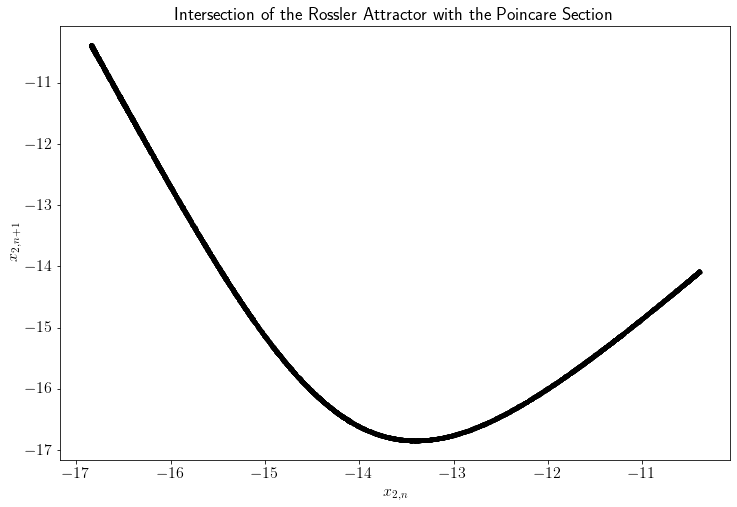

In [5]:
# Plot Rossler Section Data

plt.plot(Psec[0][:-1],Psec[0][1:],'k.')
plt.title("Intersection of the Rossler Attractor with the Poincare Section")
plt.xlabel("$x_{2,n}$")
plt.ylabel("$x_{2,n+1}$")

## **Network Training**

In [17]:
import tensorflow as tf
from architecture_1D import Conjugacy

width = 80
size_x = 1 #number of x variables
degree = 2 #degree of latent mapping
activation = 'selu'
steps = 2
numblks_in = 1
numblks_out = 1
c1 = 3.5 # initialized mapping coefficients
c2 = -3.5
c3 = 0.0
c4 = 0.0
c5 = 0.0
learning_rate = 0.0005

conjugacy = Conjugacy(width, size_x, activation, degree, steps, numblks_in, numblks_out, c1, c2)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10) # patience is set intentially low to speed up examples

optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
conjugacy.compile(optimizer=optimizer, loss = 'mse')

conjugacy.fit(xnforward, xnp1, callbacks = [callback], epochs = 1000)

Epoch 1/1000
307/307 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 2/1000
307/307 [==============================] - 0s 1ms/step - loss: 0.2941
Epoch 3/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2940
Epoch 4/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 5/1000
307/307 [==============================] - 0s 1ms/step - loss: 0.2937
Epoch 6/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 7/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 8/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 9/1000
307/307 [==============================] - 0s 1ms/step - loss: 0.2836
Epoch 10/1000
307/307 [==============================] - 0s 1ms/step - loss: 0.2801
Epoch 11/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 12/1000
307/307 [==============================] - 0s 2ms/step - loss: 0.2751
E

## **Network Output**

In [18]:
# Print Discovered Mapping

print('Discovered Conjugate Mapping:')
print('')
print('g(y) =',conjugacy.c1.numpy(),'*y +',conjugacy.c2.numpy(),'*y^2')

# Network Summary
print('')
conjugacy.summary()

Discovered Conjugate Mapping:

g(y) = 2.710139 *y + -14.737839 *y^2

Model: "conjugacy_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 1)                 241       
_________________________________________________________________
sequential_9 (Sequential)    (None, 1)                 241       
Total params: 487
Trainable params: 484
Non-trainable params: 3
_________________________________________________________________
